In [1638]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OrdinalEncoder

# Preprocessing the data and training the model

In [1639]:
raw_dataset = pd.read_csv('../data/okcupid.csv') 
okcupid_profiles = raw_dataset.drop(columns="Unnamed: 0") 

As we can see from the output below, almost every column contains object types, which we can not use to fit the Random Forest. 
We need to convert the objects into numbers, and we can do that using OrdinalEncoder from sklearn.
We also need to manage the missing data

In [1640]:
okcupid_profiles.dtypes

age              int64
status          object
sex             object
orientation     object
body_type       object
diet            object
drinks          object
drugs           object
education       object
ethnicity       object
height         float64
income           int64
job             object
last_online     object
location        object
offspring       object
pets            object
religion        object
sign            object
smokes          object
speaks          object
dtype: object

## Reworking the dataset
### Dropping columns

We noticed that for many labels, the value distribution is... a bit unusable. We have like 50000 occurences of a single value, and too few of the others.
We decided to solve this by introducing some changes to the dataset.

We are going to drop the following columns:

In [1641]:
okcupid_profiles = okcupid_profiles.drop(columns = ['status', 
                                                     'orientation',
                                                     'diet',
                                                     'drinks',
                                                     'drugs',
                                                     'education',
                                                     'ethnicity',
                                                     'income',
                                                     'last_online',
                                                     'offspring',
                                                     'pets',
                                                     'smokes',
                                                     'speaks'])

Now we are left with:

In [1642]:
for element in okcupid_profiles.columns:
    print(element)

age
sex
body_type
height
job
location
religion
sign


### Handling 'age'

In [1643]:
okcupid_profiles['age_grouped'] = okcupid_profiles['age'].apply(lambda x: 5*np.floor(x/5))
print( okcupid_profiles['age_grouped'].value_counts() )
okcupid_profiles.drop(columns = 'age')

25.0     17818
30.0     12579
20.0     10003
35.0      7267
40.0      4648
45.0      2690
50.0      1650
55.0      1210
15.0       920
60.0       789
65.0       370
110.0        1
105.0        1
Name: age_grouped, dtype: int64


,sex,body_type,height,job,location,religion,sign,age_grouped
0,m,a little extra,75.0,transportation,"south san francisco, california",agnosticism and very serious about it,gemini,20.0
1,m,average,70.0,hospitality / travel,"oakland, california",agnosticism but not too serious about it,cancer,35.0
2,m,thin,68.0,NaN,"san francisco, california",NaN,pisces but it doesn&rsquo;t matter,35.0
3,m,thin,71.0,student,"berkeley, california",NaN,pisces,20.0
4,m,athletic,66.0,artistic / musical / writer,"san francisco, california",NaN,aquarius,25.0
...,...,...,...,...,...,...,...,...
59941,f,NaN,62.0,sales / marketing / biz dev,"oakland, california",catholicism but not too serious about it,cancer and it&rsquo;s fun to think about,55.0
59942,m,fit,72.0,entertainment / media,"san francisco, california",agnosticism,leo but it doesn&rsquo;t matter,20.0
59943,m,average,71.0,construction / craftsmanship,"south san francisco, california",christianity but not too serious about it,sagittarius but it doesn&rsquo;t matter,40.0
59944,m,athletic,73.0,medicine / health,"san francisco, california",agnosticism but not too serious about it,leo and it&rsquo;s fun to think about,25.0


### Handling 'religion'

In [1644]:
pd.isna(okcupid_profiles["religion"]).sum()

20226

In [1645]:
okcupid_profiles['religion'].value_counts()

agnosticism                                   2724
other                                         2691
agnosticism but not too serious about it      2636
agnosticism and laughing about it             2496
catholicism but not too serious about it      2318
atheism                                       2175
other and laughing about it                   2119
atheism and laughing about it                 2074
christianity                                  1957
christianity but not too serious about it     1952
other but not too serious about it            1554
judaism but not too serious about it          1517
atheism but not too serious about it          1318
catholicism                                   1064
christianity and somewhat serious about it     927
atheism and somewhat serious about it          848
other and somewhat serious about it            846
catholicism and laughing about it              726
judaism and laughing about it                  681
buddhism but not too serious ab

As we can see from the value count, the data is a bit too sparse. We are going to merge all the various religion occurences together.

In [1646]:
# in the religion column, find values containing the word "christian" and replace them with "christian"
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('christianity but not too serious about it', 'christian')
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('christianity and very serious about it', 'christian')
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('christianity and somewhat serious about it', 'christian')
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('christianity and laughing about it', 'christian')
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('christianity and somewhat serious about it', 'christian')
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('christianity and very serious about it', 'christian')
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('christianity', 'christian')

In [1647]:
# in the religion column, find values containing the word "agnosticism" and replace them with "agnostic"
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('agnosticism but not too serious about it', 'agnostic')
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('agnosticism and very serious about it', 'agnostic')
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('agnosticism and somewhat serious about it', 'agnostic')
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('agnosticism and laughing about it', 'agnostic')
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('agnosticism and somewhat serious about it', 'agnostic')
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('agnosticism and very serious about it', 'agnostic')
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('agnosticism', 'agnostic')

In [1648]:
# in the religion column, find values containing the word "atheism" and replace them with "atheist"
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('atheism but not too serious about it', 'atheist')
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('atheism and very serious about it', 'atheist')
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('atheism and somewhat serious about it', 'atheist')
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('atheism and laughing about it', 'atheist')
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('atheism and somewhat serious about it', 'atheist')
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('atheism and very serious about it', 'atheist')
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('atheism', 'atheist')

In [1649]:
# in the religion column, find values containing the word "catholicism" and replace them with "catholic"
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('catholicism but not too serious about it', 'catholic')
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('catholicism and very serious about it', 'catholic')
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('catholicism and somewhat serious about it', 'catholic')
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('catholicism and laughing about it', 'catholic')
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('catholicism and somewhat serious about it', 'catholic')
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('catholicism and very serious about it', 'catholic')
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('catholicism', 'catholic')

In [1650]:
# in the religion column, find values containing the word "judaism" and replace them with "jewish"
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('judaism but not too serious about it', 'jewish')
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('judaism and very serious about it', 'jewish')
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('judaism and somewhat serious about it', 'jewish')
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('judaism and laughing about it', 'jewish')
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('judaism and somewhat serious about it', 'jewish')
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('judaism and very serious about it', 'jewish')
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('judaism', 'jewish')

In [1651]:
# in the religion column, find values containing the word "buddhism" and replace them with "buddhist"
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('buddhism but not too serious about it', 'buddhist')
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('buddhism and very serious about it', 'buddhist')
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('buddhism and somewhat serious about it', 'buddhist')
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('buddhism and laughing about it', 'buddhist')
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('buddhism and somewhat serious about it', 'buddhist')
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('buddhism and very serious about it', 'buddhist')
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('buddhism', 'buddhist')

In [1652]:
# in the religion column, find values containing the word "hinduism" and replace them with "hindu"
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('hinduism but not too serious about it', 'hindu')
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('hinduism and very serious about it', 'hindu')
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('hinduism and somewhat serious about it', 'hindu')
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('hinduism and laughing about it', 'hindu')
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('hinduism and somewhat serious about it', 'hindu')
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('hinduism and very serious about it', 'hindu')
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('hinduism', 'hindu')

In [1653]:
# in the religion column, find values containing the word "islam" and replace them with "muslim"
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('islam but not too serious about it', 'muslim')
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('islam and very serious about it', 'muslim')
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('islam and somewhat serious about it', 'muslim')
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('islam and laughing about it', 'muslim')
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('islam and somewhat serious about it', 'muslim')
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('islam and very serious about it', 'muslim')
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('islam', 'muslim')

In [1654]:
# in the religion column, find values containing the word "other" and replace them with "other"
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('other but not too serious about it', 'other')
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('other and very serious about it', 'other')
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('other and somewhat serious about it', 'other')
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('other and laughing about it', 'other')
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('other and somewhat serious about it', 'other')
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('other and very serious about it', 'other')
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('other', 'other')

In [1655]:
print(okcupid_profiles['religion'].value_counts())
print("Missing values: ", okcupid_profiles['religion'].isnull().sum())

agnostic     8812
other        7743
atheist      6985
christian    5787
catholic     4758
jewish       3098
buddhist     1948
hindu         450
muslim        139
Name: religion, dtype: int64
Missing values:  20226


At this point, we noticed that we have too many missing values, since we are also considering the 'other' as basically missing. So we are just going to have to convert the religion attribute to a boolean.

In [1656]:
"""for the religion column, convert the missing data into a boolean false, 
convert the 'other' values into boolean false, and the rest boolean true
"""
okcupid_profiles['religion'] = okcupid_profiles['religion'].fillna(False)
okcupid_profiles['religion'] = okcupid_profiles['religion'].replace('other', False)
okcupid_profiles['religion'] = okcupid_profiles['religion'].replace('agnostic', True)
okcupid_profiles['religion'] = okcupid_profiles['religion'].replace('atheist', True)
okcupid_profiles['religion'] = okcupid_profiles['religion'].replace('christian', True)
okcupid_profiles['religion'] = okcupid_profiles['religion'].replace('catholic', True)
okcupid_profiles['religion'] = okcupid_profiles['religion'].replace('jewish', True)
okcupid_profiles['religion'] = okcupid_profiles['religion'].replace('buddhist', True)
okcupid_profiles['religion'] = okcupid_profiles['religion'].replace('hindu', True)
okcupid_profiles['religion'] = okcupid_profiles['religion'].replace('muslim', True)


In [1657]:
okcupid_profiles.rename(columns = {'religion': 'religious'}, inplace=True)

In [1658]:
okcupid_profiles['religious'].value_counts()

True     31977
False    27969
Name: religious, dtype: int64

### Handling 'sign'

In [1659]:
pd.isna(okcupid_profiles["sign"]).sum()

11056

In [1660]:
okcupid_profiles['sign'].value_counts()

gemini and it&rsquo;s fun to think about         1782
scorpio and it&rsquo;s fun to think about        1772
leo and it&rsquo;s fun to think about            1692
libra and it&rsquo;s fun to think about          1649
taurus and it&rsquo;s fun to think about         1640
cancer and it&rsquo;s fun to think about         1597
pisces and it&rsquo;s fun to think about         1592
sagittarius and it&rsquo;s fun to think about    1583
virgo and it&rsquo;s fun to think about          1574
aries and it&rsquo;s fun to think about          1573
aquarius and it&rsquo;s fun to think about       1503
virgo but it doesn&rsquo;t matter                1497
leo but it doesn&rsquo;t matter                  1457
cancer but it doesn&rsquo;t matter               1454
gemini but it doesn&rsquo;t matter               1453
taurus but it doesn&rsquo;t matter               1450
libra but it doesn&rsquo;t matter                1408
aquarius but it doesn&rsquo;t matter             1408
capricorn and it&rsquo;s fun

In [1661]:
# in the religion column, find values containing the word "christian" and replace them with "christian"
okcupid_profiles['sign'] = okcupid_profiles['sign'].str.replace('gemini and it&rsquo;s fun to think about', 'gemini')
okcupid_profiles['sign'] = okcupid_profiles['sign'].str.replace('gemini but it doesn&rsquo;t matter', 'gemini')
okcupid_profiles['sign'] = okcupid_profiles['sign'].str.replace('gemini and it matters a lot', 'gemini')

In [1662]:
okcupid_profiles['sign'] = okcupid_profiles['sign'].str.replace('scorpio and it&rsquo;s fun to think about', 'scorpio')
okcupid_profiles['sign'] = okcupid_profiles['sign'].str.replace('scorpio but it doesn&rsquo;t matter', 'scorpio')
okcupid_profiles['sign'] = okcupid_profiles['sign'].str.replace('scorpio and it matters a lot', 'scorpio')

In [1663]:
okcupid_profiles['sign'] = okcupid_profiles['sign'].str.replace('leo and it&rsquo;s fun to think about', 'leo')
okcupid_profiles['sign'] = okcupid_profiles['sign'].str.replace('leo but it doesn&rsquo;t matter', 'leo')
okcupid_profiles['sign'] = okcupid_profiles['sign'].str.replace('leo and it matters a lot', 'leo')

In [1664]:
okcupid_profiles['sign'] = okcupid_profiles['sign'].str.replace('libra and it&rsquo;s fun to think about', 'libra')
okcupid_profiles['sign'] = okcupid_profiles['sign'].str.replace('libra but it doesn&rsquo;t matter', 'libra')
okcupid_profiles['sign'] = okcupid_profiles['sign'].str.replace('libra and it matters a lot', 'libra')

In [1665]:
okcupid_profiles['sign'] = okcupid_profiles['sign'].str.replace('taurus and it&rsquo;s fun to think about', 'taurus')
okcupid_profiles['sign'] = okcupid_profiles['sign'].str.replace('taurus but it doesn&rsquo;t matter', 'taurus')
okcupid_profiles['sign'] = okcupid_profiles['sign'].str.replace('taurus and it matters a lot', 'taurus')

In [1666]:
okcupid_profiles['sign'] = okcupid_profiles['sign'].str.replace('cancer and it&rsquo;s fun to think about', 'cancer')
okcupid_profiles['sign'] = okcupid_profiles['sign'].str.replace('cancer but it doesn&rsquo;t matter', 'cancer')
okcupid_profiles['sign'] = okcupid_profiles['sign'].str.replace('cancer and it matters a lot', 'cancer')

In [1667]:
okcupid_profiles['sign'] = okcupid_profiles['sign'].str.replace('pisces and it&rsquo;s fun to think about', 'pisces')
okcupid_profiles['sign'] = okcupid_profiles['sign'].str.replace('pisces but it doesn&rsquo;t matter', 'pisces')
okcupid_profiles['sign'] = okcupid_profiles['sign'].str.replace('pisces and it matters a lot', 'pisces')

In [1668]:
okcupid_profiles['sign'] = okcupid_profiles['sign'].str.replace('sagittarius and it&rsquo;s fun to think about', 'sagittarius')
okcupid_profiles['sign'] = okcupid_profiles['sign'].str.replace('sagittarius but it doesn&rsquo;t matter', 'sagittarius')
okcupid_profiles['sign'] = okcupid_profiles['sign'].str.replace('sagittarius and it matters a lot', 'sagittarius')

In [1669]:
okcupid_profiles['sign'] = okcupid_profiles['sign'].str.replace('virgo and it&rsquo;s fun to think about', 'virgo')
okcupid_profiles['sign'] = okcupid_profiles['sign'].str.replace('virgo but it doesn&rsquo;t matter', 'virgo')
okcupid_profiles['sign'] = okcupid_profiles['sign'].str.replace('virgo and it matters a lot', 'virgo')

In [1670]:
okcupid_profiles['sign'] = okcupid_profiles['sign'].str.replace('aries and it&rsquo;s fun to think about', 'aries')
okcupid_profiles['sign'] = okcupid_profiles['sign'].str.replace('aries but it doesn&rsquo;t matter', 'aries')
okcupid_profiles['sign'] = okcupid_profiles['sign'].str.replace('aries and it matters a lot', 'aries')

In [1671]:
okcupid_profiles['sign'] = okcupid_profiles['sign'].str.replace('aquarius and it&rsquo;s fun to think about', 'aquarius')
okcupid_profiles['sign'] = okcupid_profiles['sign'].str.replace('aquarius but it doesn&rsquo;t matter', 'aquarius')
okcupid_profiles['sign'] = okcupid_profiles['sign'].str.replace('aquarius and it matters a lot', 'aquarius')

In [1672]:
okcupid_profiles['sign'] = okcupid_profiles['sign'].str.replace('capricorn and it&rsquo;s fun to think about', 'capricorn')
okcupid_profiles['sign'] = okcupid_profiles['sign'].str.replace('capricorn but it doesn&rsquo;t matter', 'capricorn')
okcupid_profiles['sign'] = okcupid_profiles['sign'].str.replace('capricorn and it matters a lot', 'capricorn')

In [1673]:
okcupid_profiles['sign'].value_counts()

leo            4374
gemini         4310
libra          4207
cancer         4206
virgo          4141
taurus         4140
scorpio        4134
aries          3989
pisces         3946
sagittarius    3942
aquarius       3928
capricorn      3573
Name: sign, dtype: int64

### Handling 'location'  

In [1674]:
okcupid_profiles['location'].value_counts()

san francisco, california         31064
oakland, california                7214
berkeley, california               4212
san mateo, california              1331
palo alto, california              1064
                                  ...  
south wellfleet, massachusetts        1
orange, california                    1
astoria, new york                     1
london, united kingdom                1
rochester, michigan                   1
Name: location, Length: 199, dtype: int64

In [1675]:
okcupid_profiles['location'] = okcupid_profiles['location'].fillna(False)
okcupid_profiles['location'] = (okcupid_profiles['location'] == 'san francisco, california')
okcupid_profiles.rename(columns = {'location': 'lives_in_san_francisco'}, inplace=True)

In [1676]:
okcupid_profiles['lives_in_san_francisco'].value_counts()

True     31064
False    28882
Name: lives_in_san_francisco, dtype: int64

## Filling the missing data

The columns containing missing data are the following:

In [1677]:
print(okcupid_profiles.isna().sum())

age                           0
sex                           0
body_type                  5296
height                        3
job                        8198
lives_in_san_francisco        0
religious                     0
sign                      11056
age_grouped                   0
dtype: int64


Since there are only three rows with missing values for height, instead of replacing the NaN with something like 0 or -1, or the average height, we think it's better to just drop them, since it is such a small number

In [1678]:
okcupid_profiles = okcupid_profiles.dropna(how = 'any', subset = 'height') 

For the following attributes, we are going to replace the missing values with a string

In [1679]:
okcupid_profiles['job'] = okcupid_profiles['job'].fillna(value = 'not specified')
okcupid_profiles['body_type'] = okcupid_profiles['body_type'].fillna(value = 'rather not say')
okcupid_profiles['sign'] = okcupid_profiles['sign'].fillna(value = 'unknown')

And now all the columns contain something

In [1680]:
print(okcupid_profiles.isna().sum())

age                       0
sex                       0
body_type                 0
height                    0
job                       0
lives_in_san_francisco    0
religious                 0
sign                      0
age_grouped               0
dtype: int64


## Encoding the data

In [1681]:
# for the sign label, drop all the value 'unknown'
okcupid_profiles = okcupid_profiles[okcupid_profiles['sign'] != 'unknown']

In [1682]:
okcupid_profiles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48889 entries, 0 to 59945
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     48889 non-null  int64  
 1   sex                     48889 non-null  object 
 2   body_type               48889 non-null  object 
 3   height                  48889 non-null  float64
 4   job                     48889 non-null  object 
 5   lives_in_san_francisco  48889 non-null  bool   
 6   religious               48889 non-null  bool   
 7   sign                    48889 non-null  object 
 8   age_grouped             48889 non-null  float64
dtypes: bool(2), float64(2), int64(1), object(4)
memory usage: 3.1+ MB


In [1683]:
enc = OrdinalEncoder()
enc.fit(okcupid_profiles)

OrdinalEncoder()

In [1684]:
encoded_data = enc.transform(okcupid_profiles)

Now we have a Numpy array with the encoded data, so no more objects, but only numbers.

In [1685]:
encoded_data.dtype

dtype('float64')

# Random Forest

## Education prediction model

In [1686]:
y = encoded_data[:,5] # This picks the sign column

X = encoded_data[:, [1,4]] # Pick all the other labels

# test_size = 0.3   means 70% training set | 30% test set
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.3, 
                                                    random_state = 42)

In [1687]:
# n_estimators is the number of trees in the forest
rfc = RandomForestClassifier(n_estimators = 128)
rfc.fit(X_train, y_train)
rfc_prediction = rfc.predict(X_test)

In [1688]:
print("Random Forest Classification report")
print(classification_report(y_test, rfc_prediction))
print("Random Forest Confusion Matrix")
print(confusion_matrix(y_test, rfc_prediction))

Random Forest Classification report
              precision    recall  f1-score   support

         0.0       0.57      0.48      0.52      7269
         1.0       0.56      0.65      0.60      7398

    accuracy                           0.56     14667
   macro avg       0.57      0.56      0.56     14667
weighted avg       0.57      0.56      0.56     14667

Random Forest Confusion Matrix
[[3480 3789]
 [2592 4806]]


Let's now plot a proper confusion matrix

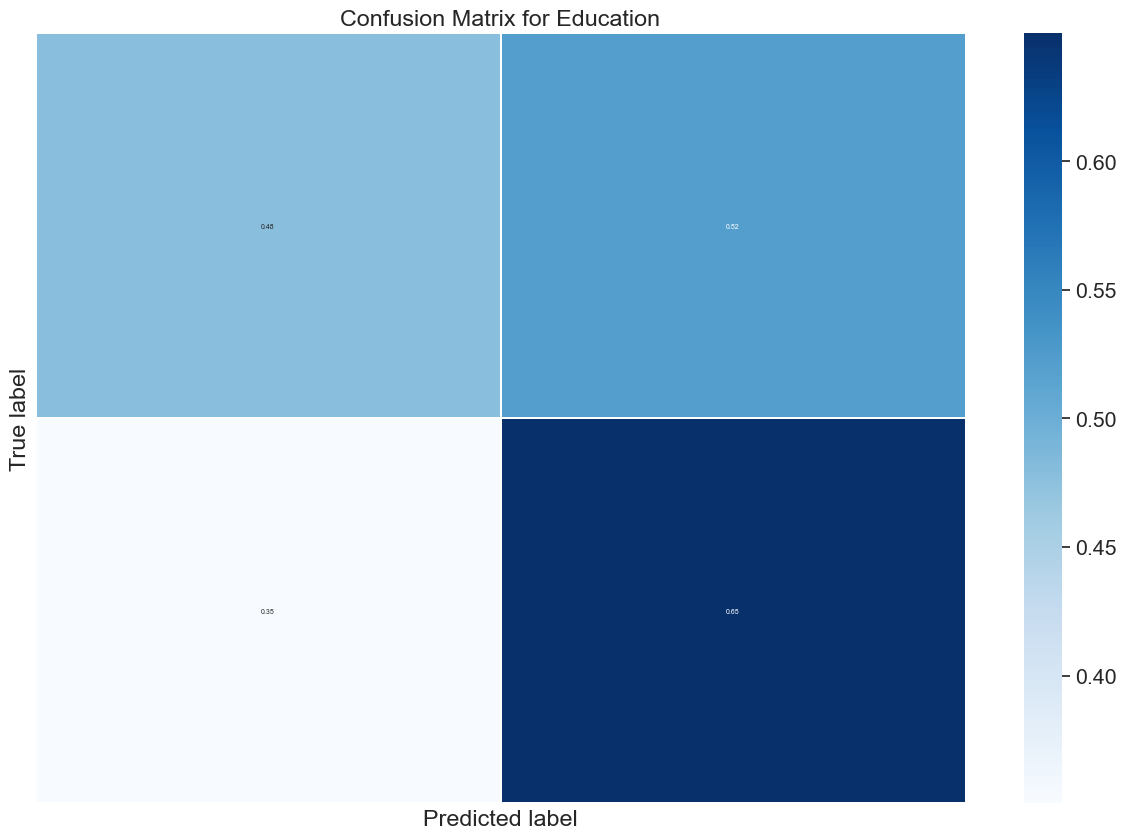

In [1689]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, rfc_prediction)

matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis] # makes number into %
#matrix = matrix.astype('float')

# Build the plot
plt.figure(figsize = (15, 10))
sns.set(font_scale = 1.4)
sns.heatmap(matrix, 
            annot = True, 
            annot_kws = {'size':5},
            cmap = plt.cm.Blues, 
            linewidths = 0.2)

# Add labels to the plot
# class_names = np.array(okcupid_profiles["income"].unique())
# class_names = [-1, 80000, 20000, 40000, 30000, 50000, 60000, 1000000, 150000, 100000, 500000, 70000, 250000]
class_names = []

tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5

plt.xticks(tick_marks, class_names, rotation=90)
plt.yticks(tick_marks2, class_names, rotation=0)

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.title('Confusion Matrix for Education')
plt.show()

<Figure size 1500x700 with 0 Axes>

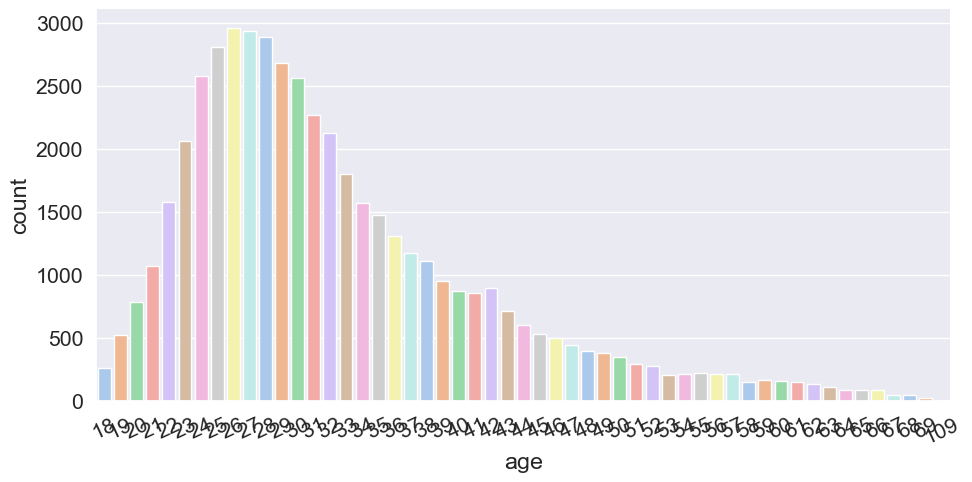

In [1690]:
plt.figure(figsize=(15, 7))

sns.catplot(x = 'age', 
            data = okcupid_profiles, 
            kind = 'count', 
            palette = 'pastel', 
            height = 5, # make the plot 5 units high
            aspect = 2)

plt.xticks(rotation = 25)

plt.show()